In [1]:
# Importing all the required libraries

In [2]:
# numpy & pandas
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine learning Libraries statsmodel and sklearn
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Reading and Understanding the data

In [3]:
#Loading the data for assignment in dataframe 'data1' 
data1=pd.read_csv('day.csv')
data1.shape

(730, 16)

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#Removing duplicates in data
data1.drop_duplicates()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [6]:
data1.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
data1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#Checking null/missing values in dataset 
data1.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
data1.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
data1.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [11]:
data1.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [12]:
data1.ndim

2

In [13]:
#Creating a summary dataframe with details about unique, null, total count, min and max for all columns
data_desc=pd.DataFrame(dict(nulls=data1.isna().sum(),nuniq=data1.nunique(),count=data1.count(),min_val=data1.min(),max_val=data1.max()),data1.columns)

In [14]:
data_desc

,nulls,nuniq,count,min_val,max_val
instant,0,730,730,1,730
dteday,0,730,730,01-01-2018,31-12-2019
season,0,4,730,1,4
yr,0,2,730,0,1
mnth,0,12,730,1,12
holiday,0,2,730,0,1
weekday,0,7,730,0,6
workingday,0,2,730,0,1
weathersit,0,3,730,1,3
temp,0,498,730,2.424346,35.328347


## Data Cleaning

#### No null values are present in data hence we can proceed further with cleaning

In [15]:
#Setting display format to 2 decimal places for decimal values
pd.set_option('display.precision',2)

#### Dropping variables that are irrelevant to analysis

In [16]:
data1.columns.values

array(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'], dtype=object)

In [17]:
#irrel_cols is array of column names that are irrelevant to model and predictions 
irrel_cols=['instant','dteday','casual','registered']

In [18]:
#cat_cols and cont_cols are categorical and continuous columns names array that will be selected from dataframe for EDA
cat_cols=['season','yr','mnth','holiday','weekday','workingday','weathersit']
cont_cols=['temp','atemp','hum','windspeed','cnt']

In [19]:
cont_cols

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [20]:
#Dropping the irrelevant columns from original dataframe and creating the dataframe data2 for further analysis
data2=data1.drop(columns=irrel_cols,axis=1)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


#### Outlier analysis on continuous variables using boxplot

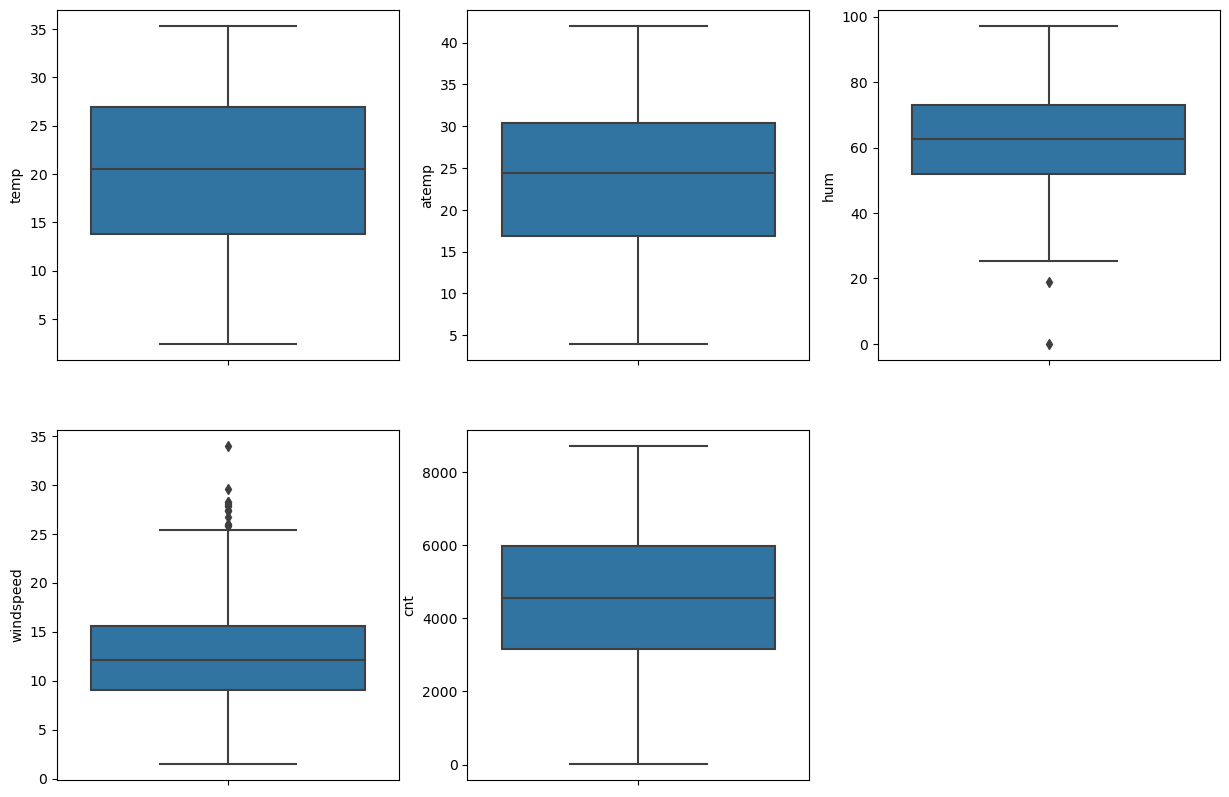

In [21]:
#Creating boxplots for cont_cols
plt.figure(figsize=(15, 10))
plt.subplot(2,3,1)
sns.boxplot( y = 'temp', data = data2)
plt.subplot(2,3,2)
sns.boxplot(y = 'atemp', data = data2)
plt.subplot(2,3,3)
sns.boxplot(y = 'hum', data = data2)
plt.subplot(2,3,4)
sns.boxplot(y = 'windspeed', data = data2)
plt.subplot(2,3,5)
sns.boxplot( y = 'cnt', data = data2)
plt.show()

#### The outlier removal is not required as there are low or no outliers in the data

## EDA

#### Visualizing the data using pairplots, correlation heatmaps and boxplot

<Figure size 1200x800 with 0 Axes>

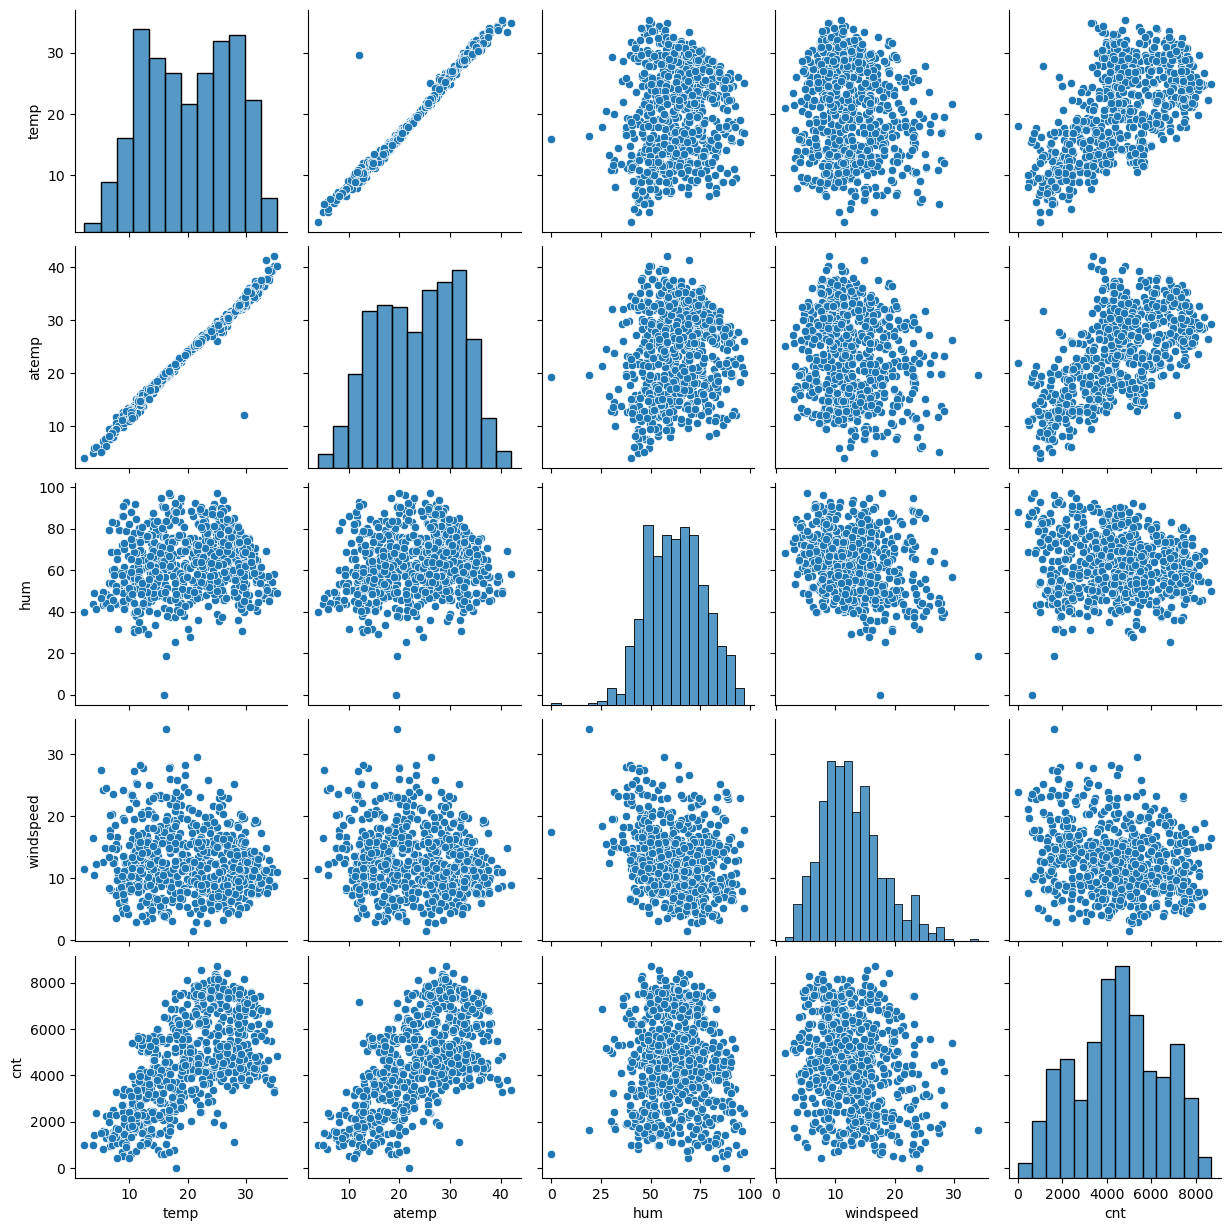

In [22]:
#Creating pairplot among all continuous variables to check linearity
plt.figure(figsize=[12,8])
sns.pairplot(data2[cont_cols])
plt.show()

In [23]:
#Checking correlation among the continuous variables
data2[cont_cols].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.00,0.99,0.13,-0.16,0.63
atemp,0.99,1.00,0.14,-0.18,0.63
hum,0.13,0.14,1.00,-0.25,-0.10
windspeed,-0.16,-0.18,-0.25,1.00,-0.24
cnt,0.63,0.63,-0.10,-0.24,1.00


<AxesSubplot:>

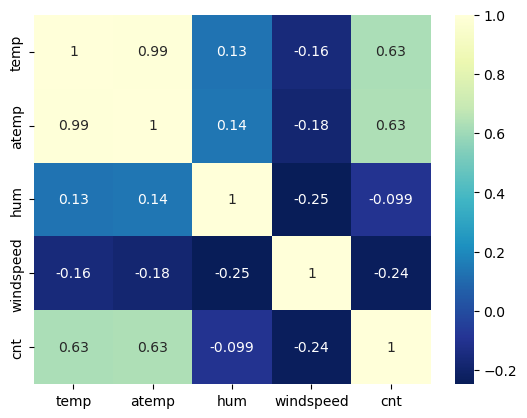

In [24]:
#Creating a heatmap for checking correlation amongs cont_cols
sns.heatmap(data=data2[cont_cols].corr(),cmap='YlGnBu_r',annot=True)

In [25]:
#Removing 'atemp' since atemp and temp are almost completely correlated with each other and 
#will cause coefficienct to swing in model 

data2.drop('atemp',axis=1,inplace=True)

#### Bivariate analysis of 'cnt' -continuous variable with Categorical variables

In [26]:
cat_cols

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

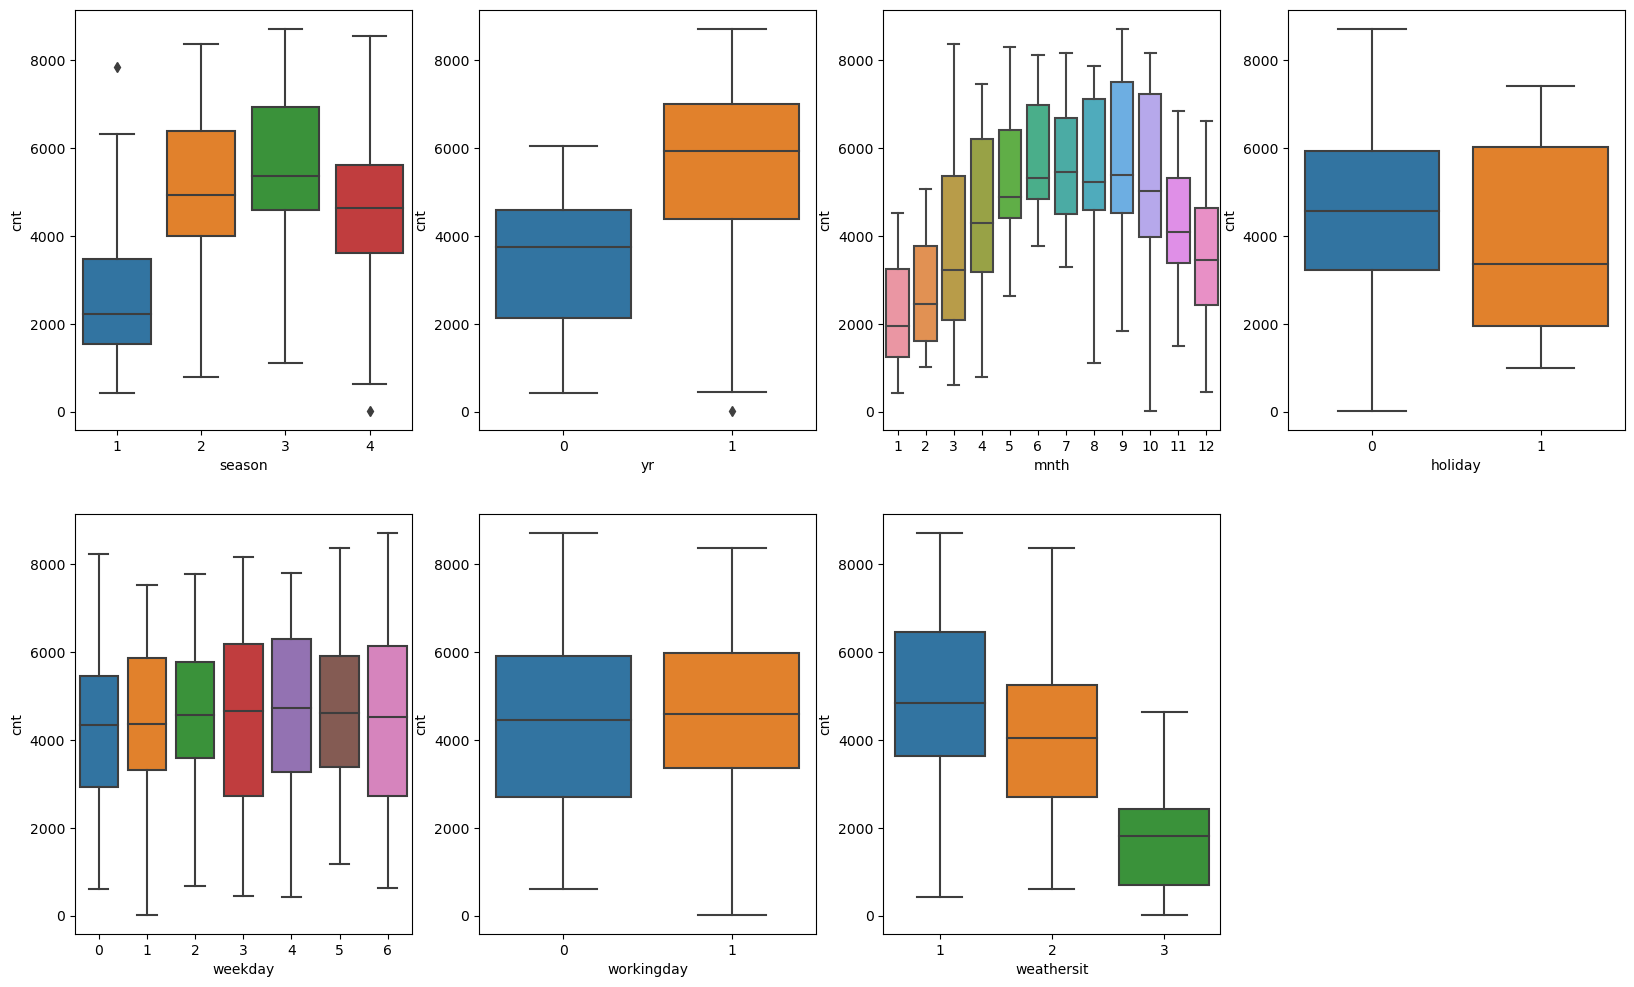

In [27]:
#Creating boxplot for all categorical variables with cnt
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = data2)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = data2)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = data2)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = data2)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = data2)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = data2)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data2)
plt.show()

#### Hence we observe that there is strong linear relationship btw cnt and temp, cnt and atemp, and very strong correlation btw temp and atemp. That is why we have removed atemp for model and predictions

#### Also from boxplots above we can see that total users varies a lot wrt to season, weather_sit, yr, holiday and month

## Data preparation - Dummy encoding

#### Converting categorical data to string values to help with dummy encoding

In [28]:
#Selecting cat_cols from data2
data2[cat_cols].head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,1,0,1,0,6,0,2
1,1,0,1,0,0,0,2
2,1,0,1,0,1,1,1


#### Checking values and value counts of categorical variables

In [29]:
data2.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [30]:
data2.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [31]:
data2.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [32]:
data2.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [33]:
data2.weekday.value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [34]:
data2.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [35]:
data2.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

#### Replacing categorical numerical values with string values except for 'yr' variable

In [36]:
data2['season']=data2.season.apply(lambda x: 'spring' if x==1 else 'summer' if x==2 else 'fall' if x==3 else 'winter')

In [37]:
data2['mnth']=data2.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [38]:
data2['holiday']=data2.holiday.map({0:'no',1:'yes'})

In [39]:
data2['weekday']=data2.weekday.map({0:'mon',1:'tue',2:'wed',3:'thu',4:'fri',5:'sat',6:'sun'})

In [40]:
data2['workingday']=data2.workingday.map({0:'no',1:'yes'})

In [41]:
data2['weathersit']=data2.weathersit.map({1:'clear',2:'mist',3:'lightrain'})

In [42]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 62.9+ KB


### Dummy encoding

In [43]:
#Creating dummydf as dataframe for storing dummy values of selected columns
#And removing first dummy columns to avoid multi collineartiy as n level categorical variable can be explained by n-1 dummy
dummy=data2[['season','mnth','holiday','weekday','workingday','weathersit']]
dummydf=pd.get_dummies(dummy,drop_first=True)

In [44]:
#Concatenating dummydf with data2
data2=pd.concat([data2,dummydf],axis=1)

In [45]:
data2.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,holiday_yes,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_yes,weathersit_lightrain,weathersit_mist
0,spring,0,jan,no,sun,no,mist,14.11,80.58,10.75,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,no,mon,no,mist,14.90,69.61,16.65,...,0,1,0,0,0,0,0,0,0,1
2,spring,0,jan,no,tue,yes,clear,8.05,43.73,16.64,...,0,0,0,0,0,1,0,1,0,0


In [46]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   season                730 non-null    object 
 1   yr                    730 non-null    int64  
 2   mnth                  730 non-null    object 
 3   holiday               730 non-null    object 
 4   weekday               730 non-null    object 
 5   workingday            730 non-null    object 
 6   weathersit            730 non-null    object 
 7   temp                  730 non-null    float64
 8   hum                   730 non-null    float64
 9   windspeed             730 non-null    float64
 10  cnt                   730 non-null    int64  
 11  season_spring         730 non-null    uint8  
 12  season_summer         730 non-null    uint8  
 13  season_winter         730 non-null    uint8  
 14  mnth_aug              730 non-null    uint8  
 15  mnth_dec              7

In [47]:
#Dropping original categorical columns since now we have their values in dummy columns
data2.drop(columns=['season','mnth','holiday','weekday','workingday','weathersit'],axis=1,inplace=True)

In [48]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yr                    730 non-null    int64  
 1   temp                  730 non-null    float64
 2   hum                   730 non-null    float64
 3   windspeed             730 non-null    float64
 4   cnt                   730 non-null    int64  
 5   season_spring         730 non-null    uint8  
 6   season_summer         730 non-null    uint8  
 7   season_winter         730 non-null    uint8  
 8   mnth_aug              730 non-null    uint8  
 9   mnth_dec              730 non-null    uint8  
 10  mnth_feb              730 non-null    uint8  
 11  mnth_jan              730 non-null    uint8  
 12  mnth_jul              730 non-null    uint8  
 13  mnth_jun              730 non-null    uint8  
 14  mnth_mar              730 non-null    uint8  
 15  mnth_may              7

In [49]:
#Checking the shape of final dataframe before train test split
data2.shape

(730, 29)

## Model building

#### Splitting dataframe data2 into training and testing dataframe 

In [50]:
df_train, df_test=train_test_split(data2,train_size=0.7,test_size=0.3,random_state=100)

In [51]:
df_train.shape

(510, 29)

In [52]:
df_test.shape

(219, 29)

#### Feature Scaling using Min Max scaling

In [53]:
scaler=MinMaxScaler()

In [54]:
data2.head(3)

,yr,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,...,holiday_yes,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_yes,weathersit_lightrain,weathersit_mist
0,0,14.11,80.58,10.75,985,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,14.90,69.61,16.65,801,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,8.05,43.73,16.64,1349,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [55]:
#Selecting continuous columns for scaling 
scale_cols=['temp','hum','windspeed','cnt']

In [56]:
#Replacing values in dataframe with scaled values
df_train[scale_cols]=scaler.fit_transform(df_train[scale_cols])

<AxesSubplot:>

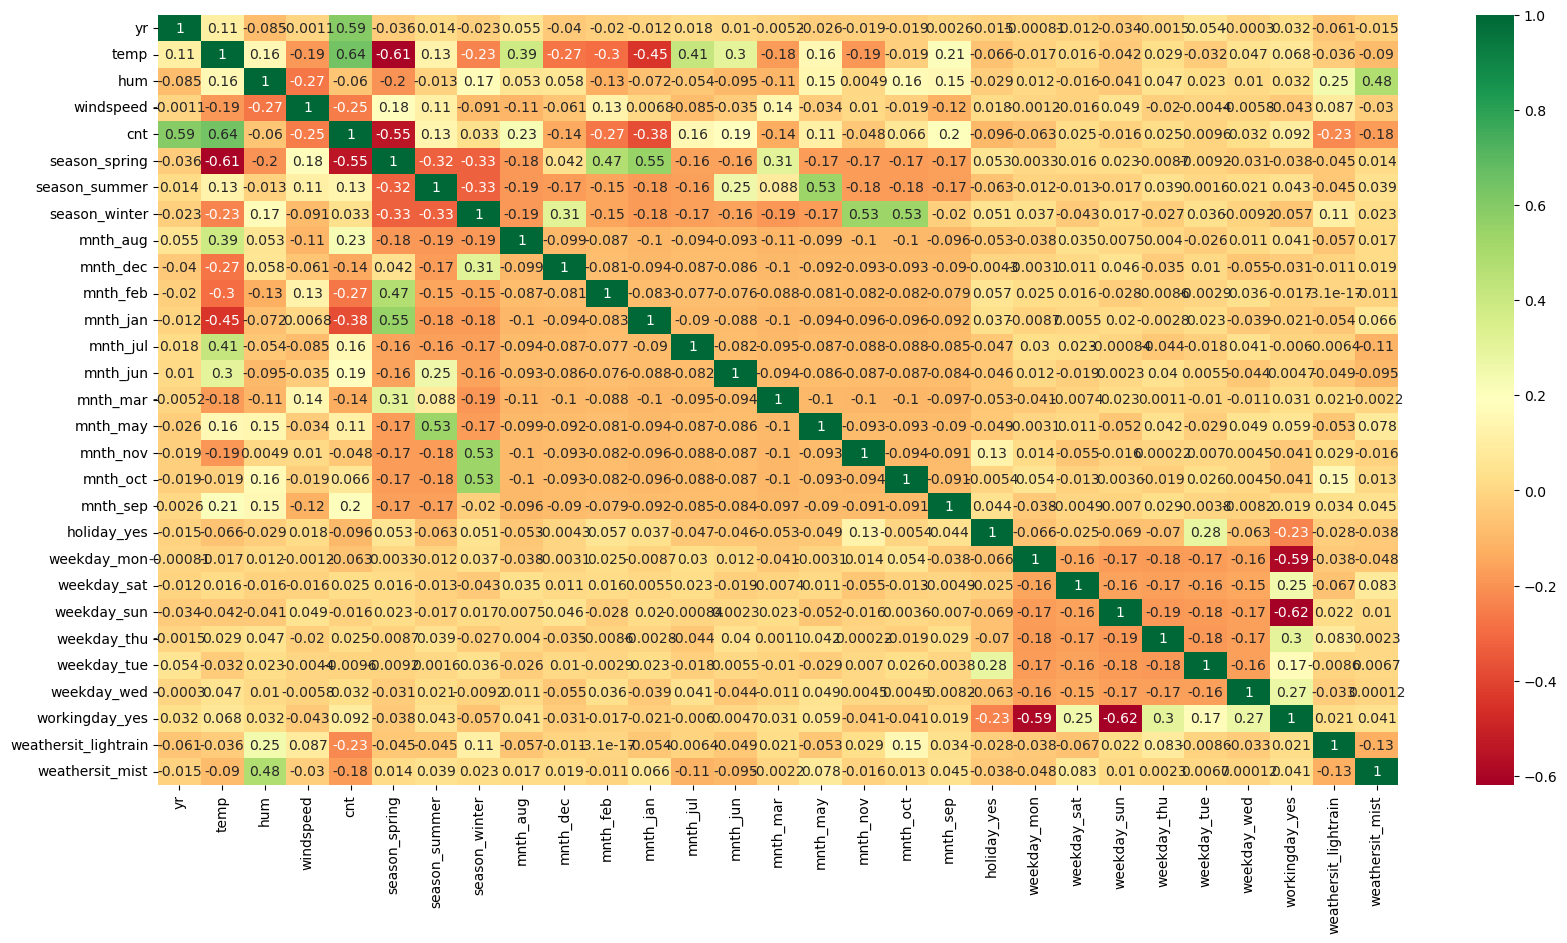

In [57]:
#Plotting heatmap to observe linearity among variable before model building
plt.figure(figsize=[20,10])
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")

In [58]:
#Defining X_train and y_train
y_train = df_train.pop("cnt")
X_train = df_train
X_train.head()

,yr,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,...,holiday_yes,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_yes,weathersit_lightrain,weathersit_mist
653,1,0.51,0.58,0.30,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
576,1,0.82,0.73,0.26,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
426,1,0.44,0.64,0.26,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0.25,0.50,0.66,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0.40,0.50,0.19,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [59]:
#Defining and fitting linear regression model 'lr'
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [60]:
#Performing RFE to select 15 top features based on recursive approach 
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [61]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 6),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 13),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 5),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 10),
 ('mnth_sep', True, 1),
 ('holiday_yes', True, 1),
 ('weekday_mon', False, 7),
 ('weekday_sat', False, 11),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 9),
 ('workingday_yes', True, 1),
 ('weathersit_lightrain', True, 1),
 ('weathersit_mist', True, 1)]

In [62]:
#Defining an array col with column names of all columns selected as signicant by RFE 
col=X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sep', 'holiday_yes',
       'weekday_sun', 'workingday_yes', 'weathersit_lightrain',
       'weathersit_mist'],
      dtype='object')

In [63]:
X_train.columns[~rfe.support_]

Index(['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jun', 'mnth_mar', 'mnth_may',
       'mnth_nov', 'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_thu',
       'weekday_tue', 'weekday_wed'],
      dtype='object')

In [64]:
#Defining X_train_rfe for manual feature elimination from X_train with selected columns as per 'col' array
X_train_rfe = X_train[col]

In [65]:
#Adding a constant and fitting a linear regression model using statsmodel.api and checking summary 
X_train_rfe1 = X_train_rfe
X_train_sm = sm.add_constant(X_train_rfe1)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 17 May 2023   Prob (F-statistic):          2.31e-191
Time:                        04:05:41   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2510      0.036      6.949      0.000       0.180       0.322
yr                       0.2305      0.008     28.807      0.000       0.215       0.246
temp                     0.5098      0.034     14.851      0.000       0.442       0.577
hum                     -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed               -0.1860      0.025     -7.301      0.000      -0.236      -0.136
season_spring           -0.0508      0.021     -2.461      0.014      -0.091      -0.010
season_summer            0.0497      0.015      3.346      0.001       0.020       0.079
season_winter            0.0944      0.017      5.479      0.000       0.061       0.128
mnth_jan                -0.0343      0.017     -1.980      0.048      -0.068      -0.000
mnth_jul                -0.0532      0.018     -2.947      0.003      -0.089      -0.018
mnth_sep                 0.0812      0.016      4.934      0.000       0.049       0.114
holiday_yes             -0.0585      0.027     -2.178      0.030      -0.111      -0.006
weekday_sun              0.0537      0.014      3.707      0.000       0.025       0.082
workingday_yes           0.0435      0.012      3.781      0.000       0.021       0.066
weathersit_lightrain    -0.2488      0.026     -9.560      0.000      -0.300      -0.198
weathersit_mist         -0.0578      0.010     -5.574      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
#Checking vif values of the variables in dataframe X_train_rfe1
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,29.40
1,temp,17.77
12,workingday_yes,5.31
3,windspeed,4.73
4,season_spring,4.53
6,season_winter,3.48
5,season_summer,2.84
14,weathersit_mist,2.29
0,yr,2.09
11,weekday_sun,1.98


In [67]:
#No variables have p value for coefficients above 0.05. Dropping 'hum' as it has highest vif 
X_train_rfe1=X_train_rfe.drop('hum',axis=1)
X_train_sm = sm.add_constant(X_train_rfe1)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 17 May 2023   Prob (F-statistic):          7.33e-189
Time:                        04:05:42   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1737      0.031      5.525      0.000       0.112       0.235
yr                       0.2344      0.008     29.019      0.000       0.218       0.250
temp                     0.4728      0.034     14.037      0.000       0.407       0.539
windspeed               -0.1563      0.025     -6.292      0.000      -0.205      -0.107
season_spring           -0.0597      0.021     -2.861      0.004      -0.101      -0.019
season_summer            0.0434      0.015      2.890      0.004       0.014       0.073
season_winter            0.0797      0.017      4.650      0.000       0.046       0.113
mnth_jan                -0.0389      0.018     -2.215      0.027      -0.073      -0.004
mnth_jul                -0.0482      0.018     -2.635      0.009      -0.084      -0.012
mnth_sep                 0.0753      0.017      4.522      0.000       0.043       0.108
holiday_yes             -0.0562      0.027     -2.058      0.040      -0.110      -0.003
weekday_sun              0.0584      0.015      3.980      0.000       0.030       0.087
workingday_yes           0.0465      0.012      3.983      0.000       0.024       0.069
weathersit_lightrain    -0.2917      0.024    -12.027      0.000      -0.339      -0.244
weathersit_mist         -0.0826      0.009     -9.592      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       67.959   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.078
Skew:                          -0.690   Prob(JB):                     8.64e-37
Kurtosis:                       5.431   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
#Checking vif values for X_train_rfe1 dataframe
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,7.07
11,workingday_yes,5.24
2,windspeed,4.67
3,season_spring,3.08
4,season_summer,2.33
0,yr,2.08
5,season_winter,1.99
10,weekday_sun,1.97
6,mnth_jan,1.62
7,mnth_jul,1.59


In [69]:
#Dropping 'hum' and 'temp' both from X_train_rfe and running model again
X_train_rfe1=X_train_rfe.drop(['hum','temp'],axis=1)
X_train_sm = sm.add_constant(X_train_rfe1)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.0
Date:                Wed, 17 May 2023   Prob (F-statistic):          4.04e-154
Time:                        04:05:42   Log-Likelihood:                 425.72
No. Observations:                 510   AIC:                            -823.4
Df Residuals:                     496   BIC:                            -764.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5448      0.020     27.136      0.000       0.505       0.584
yr                       0.2478      0.009     26.156      0.000       0.229       0.266
windspeed               -0.1878      0.029     -6.429      0.000      -0.245      -0.130
season_spring           -0.2603      0.018    -14.490      0.000      -0.296      -0.225
season_summer           -0.0440      0.016     -2.729      0.007      -0.076      -0.012
season_winter           -0.0749      0.016     -4.829      0.000      -0.105      -0.044
mnth_jan                -0.1024      0.020     -5.104      0.000      -0.142      -0.063
mnth_jul                -0.0099      0.021     -0.461      0.645      -0.052       0.032
mnth_sep                 0.0708      0.020      3.601      0.000       0.032       0.109
holiday_yes             -0.0571      0.032     -1.771      0.077      -0.120       0.006
weekday_sun              0.0564      0.017      3.252      0.001       0.022       0.090
workingday_yes           0.0480      0.014      3.482      0.001       0.021       0.075
weathersit_lightrain    -0.3045      0.029    -10.634      0.000      -0.361      -0.248
weathersit_mist         -0.0896      0.010     -8.824      0.000      -0.110      -0.070
==============================================================================
Omnibus:                       34.622   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.832
Skew:                          -0.419   Prob(JB):                     3.07e-15
Kurtosis:                       4.563   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
#Checking vif values for variables in X_train_rfe1 dataframe
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,4.27
10,workingday_yes,3.83
2,season_spring,2.97
3,season_summer,2.27
4,season_winter,1.99
0,yr,1.91
9,weekday_sun,1.69
5,mnth_jan,1.60
12,weathersit_mist,1.56
6,mnth_jul,1.30


In [71]:
#Dropping mnth_jul (along with 'hum' and 'temp') as its p vlaue is insignificant
X_train_rfe1=X_train_rfe.drop(['hum','temp','mnth_jul'],axis=1)
X_train_sm = sm.add_constant(X_train_rfe1)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     147.6
Date:                Wed, 17 May 2023   Prob (F-statistic):          3.62e-155
Time:                        04:05:42   Log-Likelihood:                 425.61
No. Observations:                 510   AIC:                            -825.2
Df Residuals:                     497   BIC:                            -770.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5409      0.018     29.669      0.000       0.505       0.577
yr                       0.2478      0.009     26.182      0.000       0.229       0.266
windspeed               -0.1877      0.029     -6.431      0.000      -0.245      -0.130
season_spring           -0.2568      0.016    -15.797      0.000      -0.289      -0.225
season_summer           -0.0405      0.014     -2.848      0.005      -0.068      -0.013
season_winter           -0.0716      0.014     -5.213      0.000      -0.099      -0.045
mnth_jan                -0.1025      0.020     -5.111      0.000      -0.142      -0.063
mnth_sep                 0.0736      0.019      3.928      0.000       0.037       0.110
holiday_yes             -0.0567      0.032     -1.760      0.079      -0.120       0.007
weekday_sun              0.0565      0.017      3.263      0.001       0.022       0.091
workingday_yes           0.0483      0.014      3.506      0.000       0.021       0.075
weathersit_lightrain    -0.3046      0.029    -10.647      0.000      -0.361      -0.248
weathersit_mist         -0.0893      0.010     -8.820      0.000      -0.109      -0.069
==============================================================================
Omnibus:                       34.752   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.753
Skew:                          -0.423   Prob(JB):                     3.20e-15
Kurtosis:                       4.558   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
#Checking vif values for variables in X_train_rfe1 dataframe
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,4.12
9,workingday_yes,3.54
2,season_spring,2.68
3,season_summer,2.00
0,yr,1.89
4,season_winter,1.78
8,weekday_sun,1.62
5,mnth_jan,1.60
11,weathersit_mist,1.56
6,mnth_sep,1.20


In [73]:
#Removing holiday_yes along with other variables already selected as holiday_yes has insignificant p value
X_train_rfe1=X_train_rfe.drop(['hum','temp','mnth_jul','holiday_yes'],axis=1)
X_train_sm = sm.add_constant(X_train_rfe1)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     160.0
Date:                Wed, 17 May 2023   Prob (F-statistic):          1.30e-155
Time:                        04:05:42   Log-Likelihood:                 424.03
No. Observations:                 510   AIC:                            -824.1
Df Residuals:                     498   BIC:                            -773.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5334      0.018     30.033      0.000       0.499       0.568
yr                       0.2480      0.009     26.149      0.000       0.229       0.267
windspeed               -0.1887      0.029     -6.453      0.000      -0.246      -0.131
season_spring           -0.2581      0.016    -15.860      0.000      -0.290      -0.226
season_summer           -0.0406      0.014     -2.847      0.005      -0.069      -0.013
season_winter           -0.0729      0.014     -5.303      0.000      -0.100      -0.046
mnth_jan                -0.1031      0.020     -5.130      0.000      -0.143      -0.064
mnth_sep                 0.0714      0.019      3.810      0.000       0.035       0.108
weekday_sun              0.0650      0.017      3.900      0.000       0.032       0.098
workingday_yes           0.0567      0.013      4.377      0.000       0.031       0.082
weathersit_lightrain    -0.3034      0.029    -10.586      0.000      -0.360      -0.247
weathersit_mist         -0.0888      0.010     -8.757      0.000      -0.109      -0.069
==============================================================================
Omnibus:                       39.474   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.218
Skew:                          -0.458   Prob(JB):                     3.81e-18
Kurtosis:                       4.714   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
#Checking vif values of variables in X_train_rfe1
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,4.04
8,workingday_yes,3.29
2,season_spring,2.65
3,season_summer,1.99
0,yr,1.88
4,season_winter,1.73
5,mnth_jan,1.60
7,weekday_sun,1.56
10,weathersit_mist,1.56
6,mnth_sep,1.18


In [75]:
#Not dropping temp to see the impact as temp has considerable linear relationship with target  
X_train_rfe1=X_train_rfe.drop(['hum','mnth_jul','holiday_yes'],axis=1)
X_train_sm = sm.add_constant(X_train_rfe1)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 17 May 2023   Prob (F-statistic):          7.16e-189
Time:                        04:05:42   Log-Likelihood:                 505.62
No. Observations:                 510   AIC:                            -985.2
Df Residuals:                     497   BIC:                            -930.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1580      0.031      5.045      0.000       0.096       0.220
yr                       0.2351      0.008     28.863      0.000       0.219       0.251
temp                     0.4600      0.034     13.690      0.000       0.394       0.526
windspeed               -0.1576      0.025     -6.292      0.000      -0.207      -0.108
season_spring           -0.0496      0.021     -2.405      0.017      -0.090      -0.009
season_summer            0.0576      0.014      4.082      0.000       0.030       0.085
season_winter            0.0902      0.017      5.396      0.000       0.057       0.123
mnth_jan                -0.0415      0.018     -2.339      0.020      -0.076      -0.007
mnth_sep                 0.0862      0.016      5.384      0.000       0.055       0.118
weekday_sun              0.0672      0.014      4.724      0.000       0.039       0.095
workingday_yes           0.0558      0.011      5.050      0.000       0.034       0.077
weathersit_lightrain    -0.2915      0.024    -11.918      0.000      -0.340      -0.243
weathersit_mist         -0.0808      0.009     -9.321      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       77.600   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.403
Skew:                          -0.776   Prob(JB):                     1.01e-42
Kurtosis:                       5.587   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
#Checking vif values. We see temp has now a vif value above 5 
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.53
9,workingday_yes,4.68
2,windspeed,4.65
3,season_spring,2.87
0,yr,2.07
4,season_summer,1.99
8,weekday_sun,1.84
5,season_winter,1.77
6,mnth_jan,1.61
11,weathersit_mist,1.57


In [77]:
#Dropping season_spring along with previously selected to see its impact on vif values
X_train_rfe1=X_train_rfe.drop(['hum','mnth_jul','holiday_yes','season_spring'],axis=1)
X_train_sm = sm.add_constant(X_train_rfe1)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     234.2
Date:                Wed, 17 May 2023   Prob (F-statistic):          8.02e-189
Time:                        04:05:42   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     498   BIC:                            -930.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1022      0.021      4.834      0.000       0.061       0.144
yr                       0.2340      0.008     28.639      0.000       0.218       0.250
temp                     0.5197      0.023     22.854      0.000       0.475       0.564
windspeed               -0.1631      0.025     -6.507      0.000      -0.212      -0.114
season_summer            0.0802      0.011      7.548      0.000       0.059       0.101
season_winter            0.1201      0.011     10.718      0.000       0.098       0.142
mnth_jan                -0.0464      0.018     -2.620      0.009      -0.081      -0.012
mnth_sep                 0.0950      0.016      6.067      0.000       0.064       0.126
weekday_sun              0.0679      0.014      4.754      0.000       0.040       0.096
workingday_yes           0.0563      0.011      5.079      0.000       0.035       0.078
weathersit_lightrain    -0.2898      0.025    -11.795      0.000      -0.338      -0.242
weathersit_mist         -0.0804      0.009     -9.228      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       70.407   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.905
Skew:                          -0.741   Prob(JB):                     3.12e-35
Kurtosis:                       5.298   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
#Checking vif values and temp vif has decreased but still above 5
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.10
8,workingday_yes,4.28
2,windspeed,3.57
0,yr,2.05
7,weekday_sun,1.75
3,season_summer,1.63
10,weathersit_mist,1.55
4,season_winter,1.47
5,mnth_jan,1.29
6,mnth_sep,1.20


In [79]:
#Dropping mnth_jan along with previously selected variables and checking its impact on vif
X_train_rfe1=X_train_rfe.drop(['hum','mnth_jul','holiday_yes','season_spring','mnth_jan'],axis=1)
X_train_sm = sm.add_constant(X_train_rfe1)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Wed, 17 May 2023   Prob (F-statistic):          1.47e-188
Time:                        04:05:43   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0753      0.019      4.051      0.000       0.039       0.112
yr                       0.2331      0.008     28.382      0.000       0.217       0.249
temp                     0.5499      0.020     27.885      0.000       0.511       0.589
windspeed               -0.1552      0.025     -6.201      0.000      -0.204      -0.106
season_summer            0.0874      0.010      8.481      0.000       0.067       0.108
season_winter            0.1318      0.010     12.760      0.000       0.112       0.152
mnth_sep                 0.0972      0.016      6.181      0.000       0.066       0.128
weekday_sun              0.0677      0.014      4.710      0.000       0.039       0.096
workingday_yes           0.0563      0.011      5.048      0.000       0.034       0.078
weathersit_lightrain    -0.2880      0.025    -11.659      0.000      -0.337      -0.239
weathersit_mist         -0.0813      0.009     -9.292      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       68.959   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.793
Skew:                          -0.731   Prob(JB):                     4.02e-34
Kurtosis:                       5.258   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
#Checking vif values of variables in X_train_rfe1 and we can see all variables have vif below 5
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.76
7,workingday_yes,4.04
2,windspeed,3.43
0,yr,2.02
6,weekday_sun,1.69
3,season_summer,1.57
9,weathersit_mist,1.53
4,season_winter,1.40
5,mnth_sep,1.20
8,weathersit_lightrain,1.08


#### Hence, selecting the final model from above and proceeding to predicting target for X_train_sm values as shown below

## Predicting for X_train_sm

In [81]:
y_train_pred = lm.predict(X_train_sm)

#### Model assumptions validation 

C:\Users\JATINARORA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

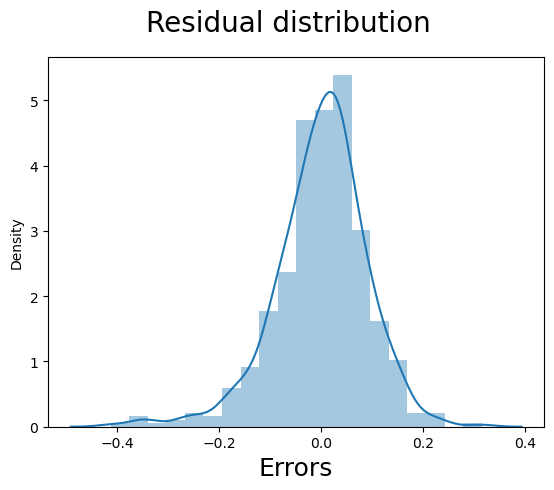

In [82]:
#Plotting histogram to check normal distribution of residuals 
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Residual distribution', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

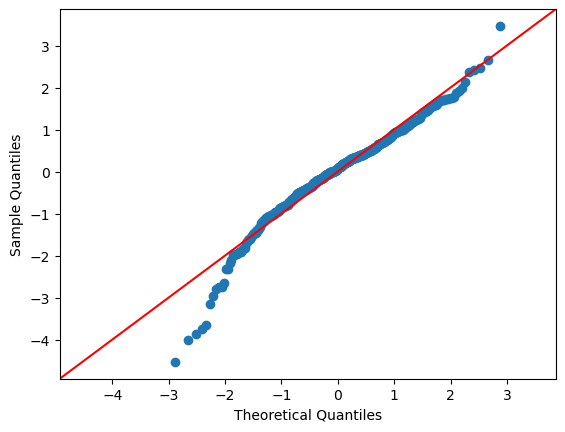

In [83]:
#Plotting a qqplot to see if Residual errors are normally distributed

sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

Text(0, 0.5, 'residuals')

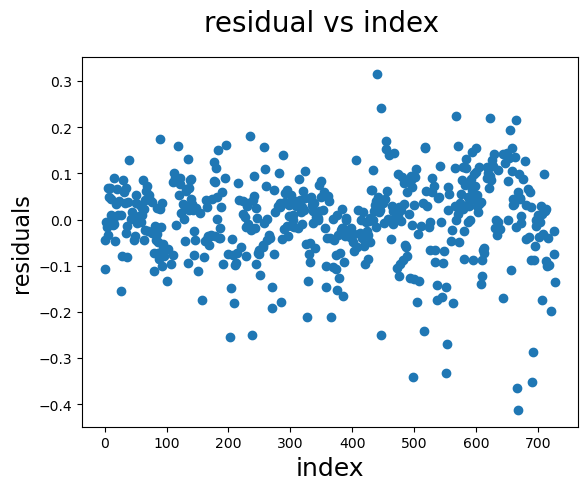

In [84]:
#Plotting scatterplot to check for Homoscedasticity - constant variance in error terms
fig = plt.figure()
plt.scatter(y=(y_train - y_train_pred), x=y_train.index)
fig.suptitle('residual vs index', fontsize=20)              
plt.xlabel('index', fontsize=18)                          
plt.ylabel('residuals', fontsize=16)  

Text(0, 0.5, 'residuals')

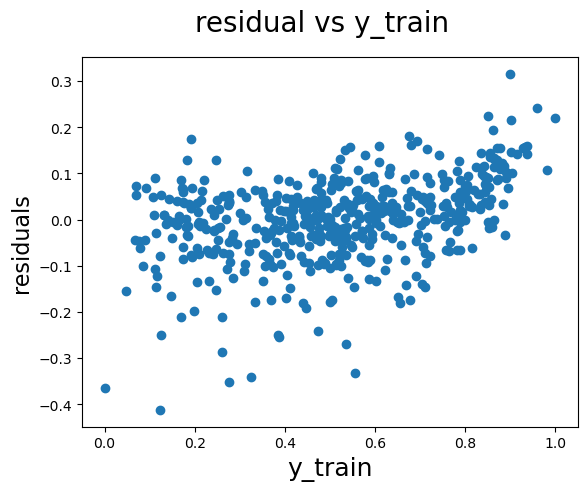

In [85]:
#Plotting scatterplot of residuals and y_train to see that no pattern/relationship is present in errors 
fig = plt.figure()
plt.scatter(y=(y_train - y_train_pred), x=y_train)
fig.suptitle('residual vs y_train', fontsize=20)              
plt.xlabel('y_train', fontsize=18)                          
plt.ylabel('residuals', fontsize=16)  

<AxesSubplot:>

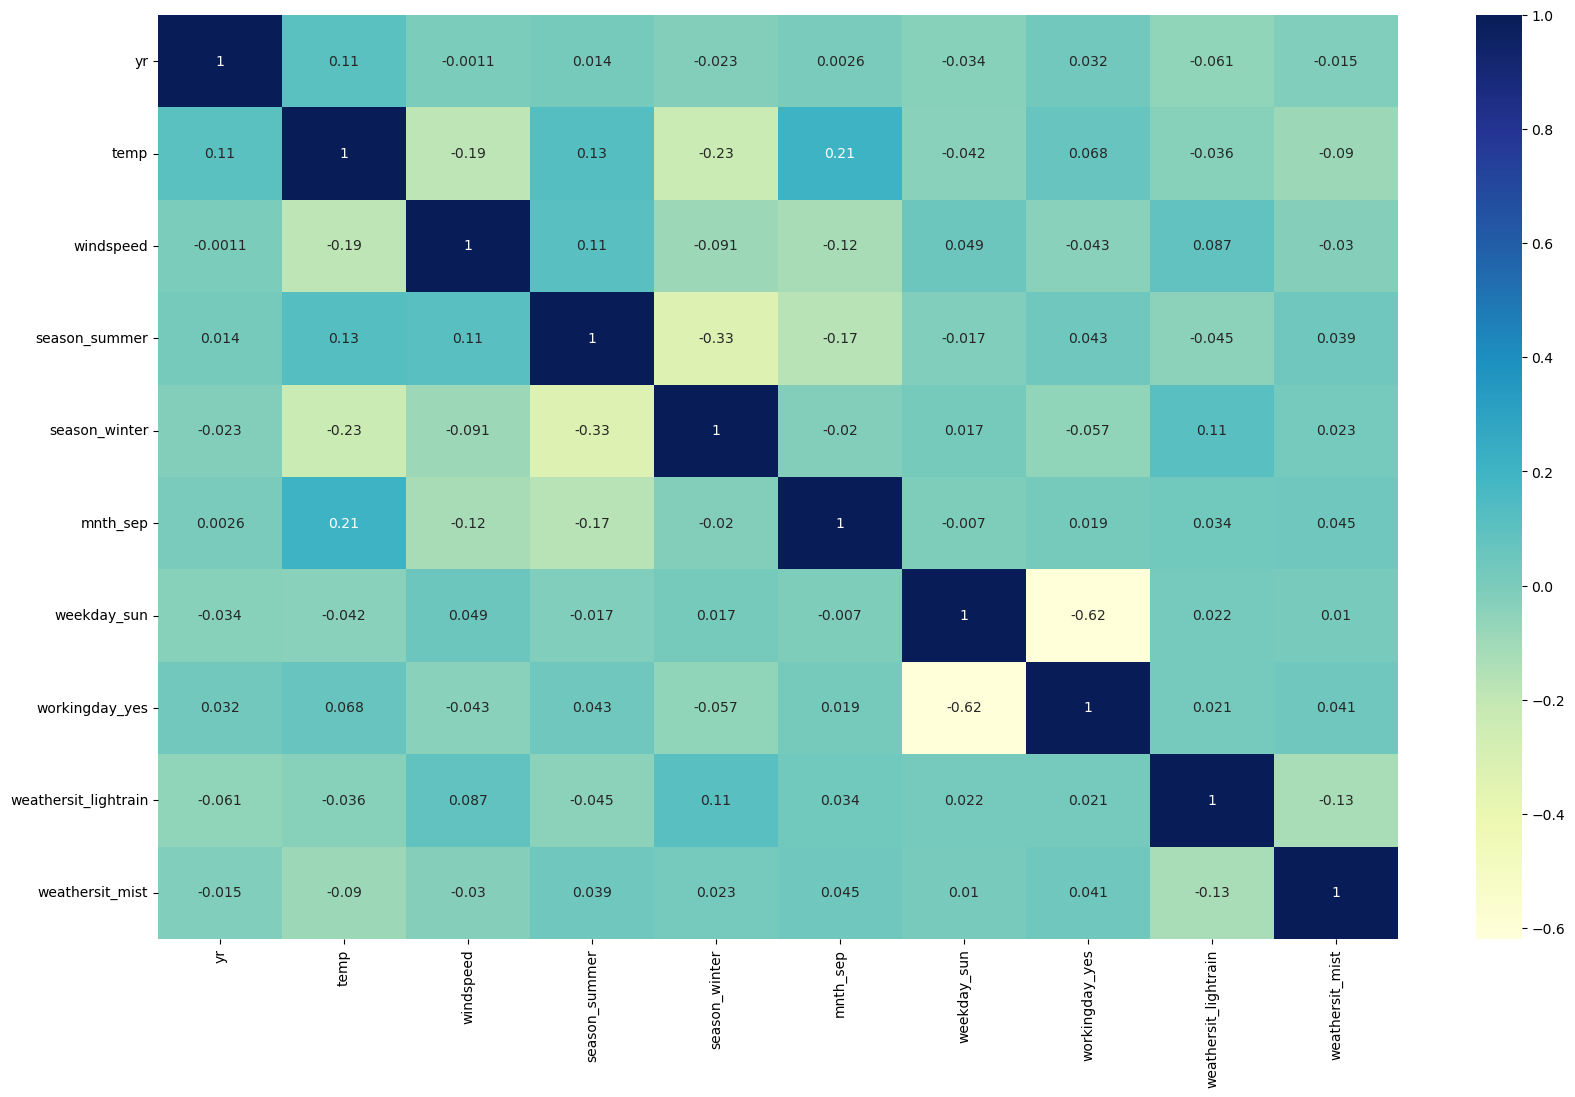

In [86]:
#Plotting a heatmap of correlation matrix to check if there is no high correlated variables
plt.figure(figsize=[20,12])
sns.heatmap(X_train_rfe1.corr(),annot=True,cmap='YlGnBu')

#### Model evaluation

In [87]:
#Model Rsquared value 
lm.rsquared

0.8357769866151917

In [88]:
#Calculating Rsquared using r2_score()
r2_score(y_true=y_train,y_pred=y_train_pred)

0.8357769866151917

In [89]:
#Model adjusted Rsquared value
lm.rsquared_adj

0.8324859442627908

In [90]:
#Calculating adjusted Rsquared value using r2_score()
Adj_r2 = 1 - (1-r2_score(y_true=y_train,y_pred=y_train_pred)) * (len(y_train)-1)/(len(y_train)-X_train_rfe1.shape[1]-1)
Adj_r2

0.8324859442627908

In [91]:
#Mean squared error on the training data actual and predicted values
mean_squared_error(y_true=y_train,y_pred=y_train_pred)

0.008267466546147666

In [92]:
#Root Mean squared error on the training data actual and predicted values
np.sqrt(mean_squared_error(y_true=y_train,y_pred=y_train_pred))

0.09092560995752333

## Predicting for test dataset 

In [93]:
#Selecting continuous columns in the test data for scaling 
scale_cols = ['temp','hum','windspeed','cnt']

#Replacing values of selected columns in test dataframe with scaled values
df_test[scale_cols] = scaler.transform(df_test[scale_cols])

In [94]:
#Defining X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [95]:
y_test

184    0.69
535    0.71
299    0.30
221    0.55
152    0.57
       ... 
400    0.34
702    0.76
127    0.50
640    0.87
72     0.23
Name: cnt, Length: 219, dtype: float64

In [96]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by selecting required variables from X_test using X_train_rfe1 column names
X_test_new0 = X_test[X_train_rfe1.columns]

# Adding a constant column 
X_test_new = sm.add_constant(X_test_new0)

#### Model Prediction on X_test

In [97]:
y_test_pred = lm.predict(X_test_new)

In [98]:
y_test_pred

184    0.44
535    0.92
299    0.41
221    0.56
152    0.59
       ... 
400    0.32
702    0.74
127    0.47
640    0.82
72     0.28
Length: 219, dtype: float64

#### Checking spread between actual and predicted and seeing if they are having linear dependence

C:\Users\JATINARORA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


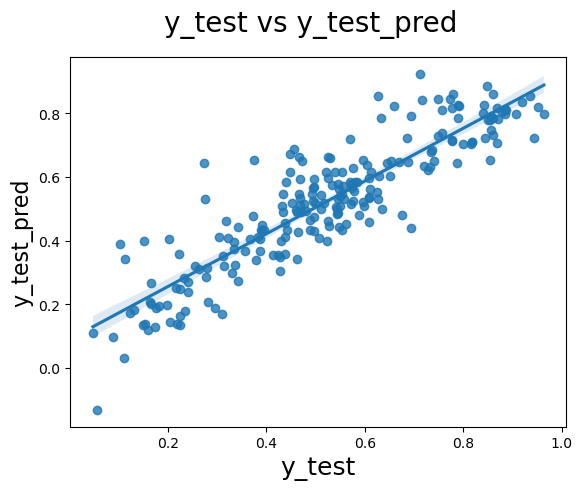

In [99]:
#Plotting y_test and y_test_pred to see the spread
fig = plt.figure()
sns.regplot(y_test,y_test_pred)
#To observe the spread and relationship bw ytest and ytest_pred
fig.suptitle('y_test vs y_test_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_test_pred', fontsize=16)   
plt.show()

#### Model assumptions validation 

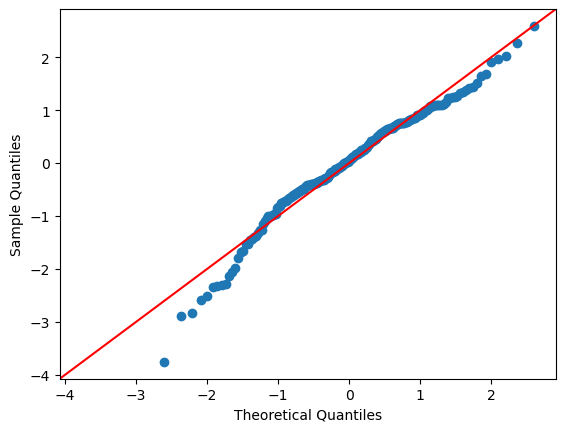

In [100]:
#Residual errors are normally distributed

sm.qqplot((y_test - y_test_pred), fit=True, line='45')
plt.show()

C:\Users\JATINARORA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

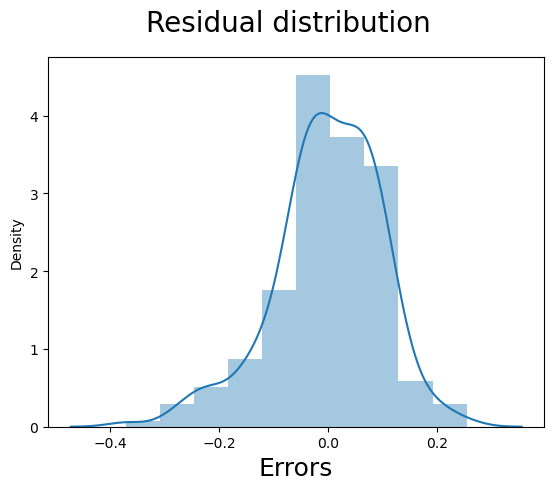

In [101]:
#Residuals errors are normally distributed
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 10)
fig.suptitle('Residual distribution', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

Text(0, 0.5, 'residuals')

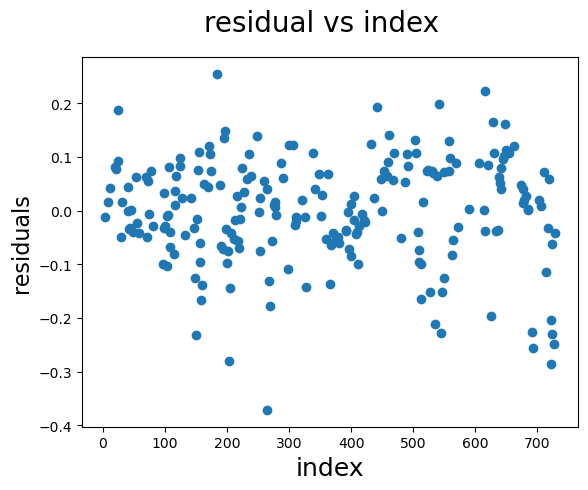

In [102]:
#Homoscedasticity
fig = plt.figure()
plt.scatter(y=(y_test - y_test_pred), x=y_test.index)
fig.suptitle('residual vs index', fontsize=20)              # Plot heading 
plt.xlabel('index', fontsize=18)                          # X-label
plt.ylabel('residuals', fontsize=16)  

Text(0, 0.5, 'residuals')

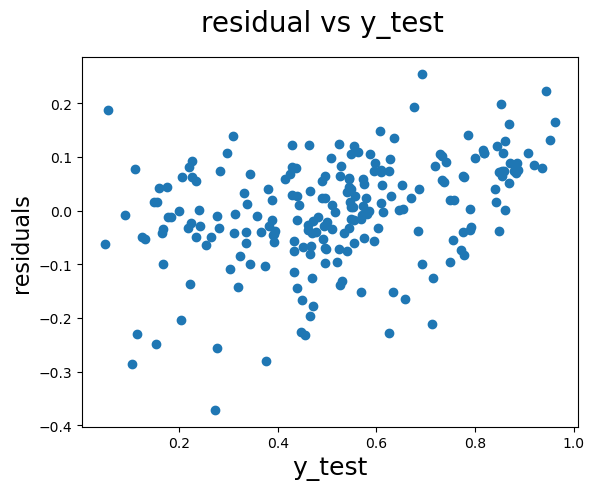

In [103]:
#No pattern/relationship in errors 
fig = plt.figure()
plt.scatter(y=(y_test - y_test_pred), x=y_test)
fig.suptitle('residual vs y_test', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('residuals', fontsize=16)  

<AxesSubplot:>

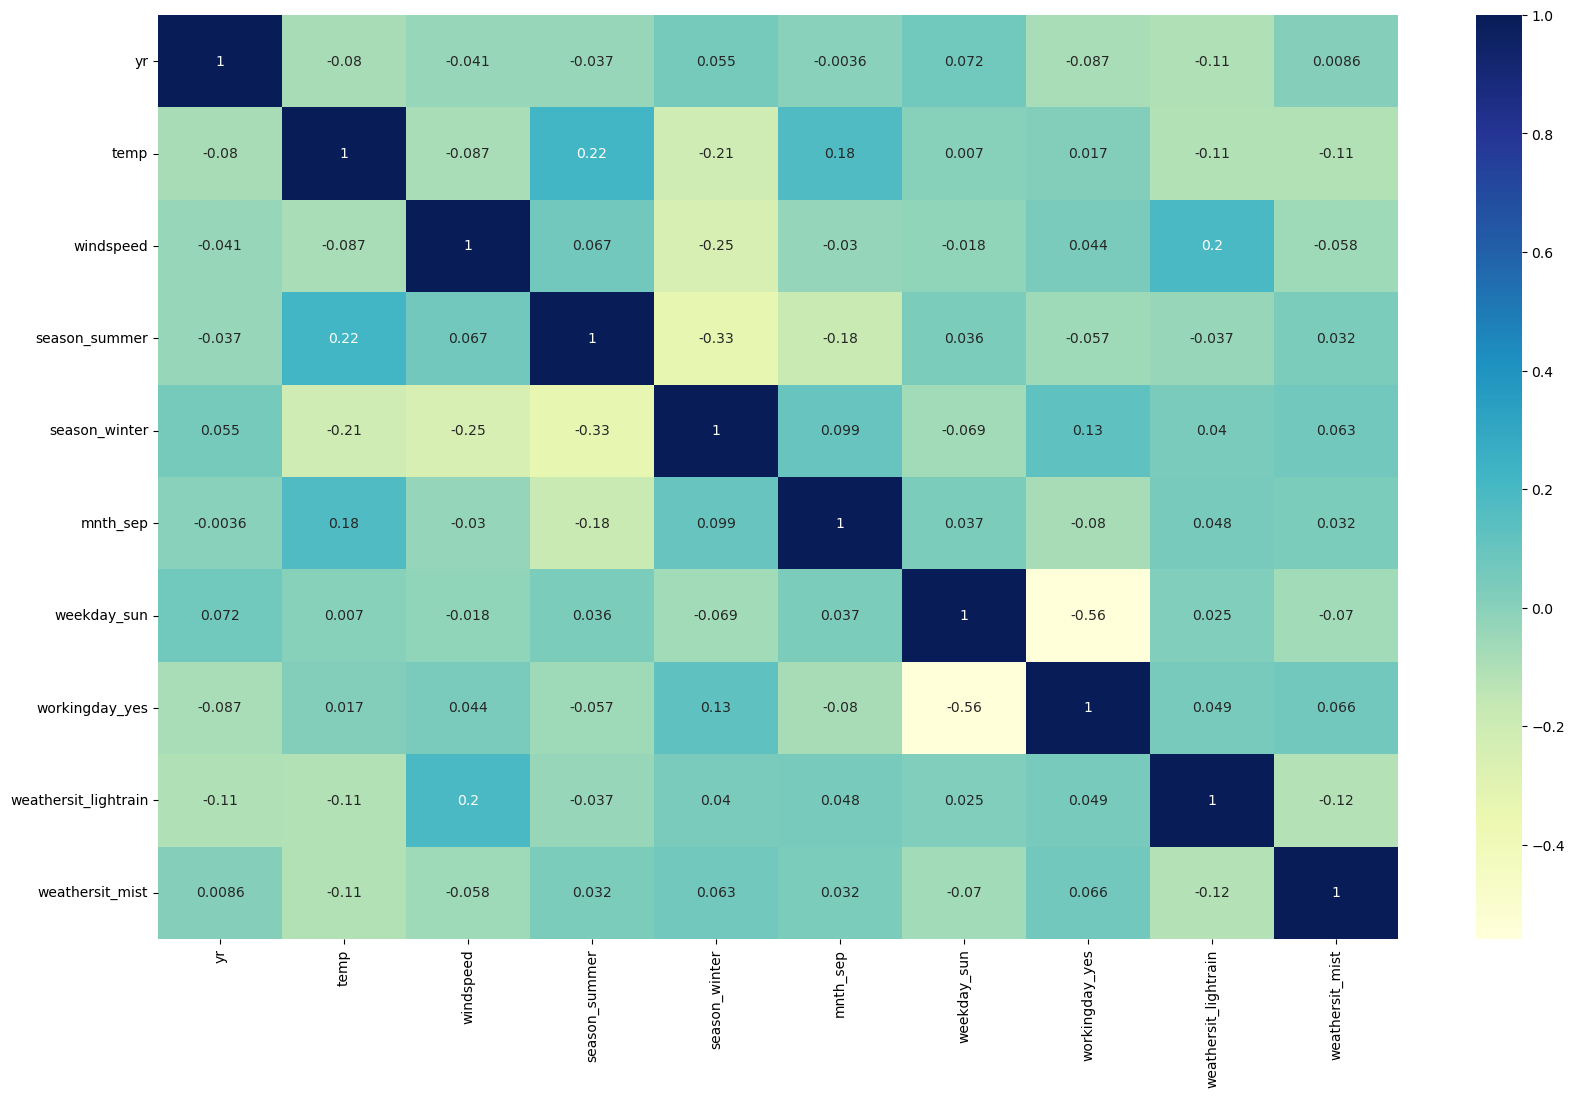

In [104]:
#No high correlated variables present among final model variables
plt.figure(figsize=[20,12])
sns.heatmap(X_test_new0.corr(),annot=True,cmap='YlGnBu')

#### Model evaluation

In [105]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7955844377237249

In [106]:
Adj_r2 = 1 - (1-r2_score(y_true=y_test,y_pred=y_test_pred)) * (len(y_test)-1)/(len(y_test)-X_test_new0.shape[1]-1)

In [107]:
Adj_r2 

0.7857567664604425

In [108]:
mean_squared_error(y_true=y_test,y_pred=y_test_pred)

0.009708882328806265

In [109]:
np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_test_pred))

0.09853366089213506

## Model interpretation

Since the error terms are not following any pattern and are randomly distributed with constant variance, that is homoscedastic in nature we can say we have a linear regression model successfully. 

There are 10 significant variables that have been selected by the regression model which are significant in predicting the demand of shared bikes as shown below



In [110]:
#Rerunning the final model again 
X_train_rfe1=X_train_rfe.drop(['hum','mnth_jul','holiday_yes','season_spring','mnth_jan'],axis=1)
X_train_sm = sm.add_constant(X_train_rfe1)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Wed, 17 May 2023   Prob (F-statistic):          1.47e-188
Time:                        11:13:12   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0753      0.019      4.051      0.000       0.039       0.112
yr                       0.2331      0.008     28.382      0.000       0.217       0.249
temp                     0.5499      0.020     27.885      0.000       0.511       0.589
windspeed               -0.1552      0.025     -6.201      0.000      -0.204      -0.106
season_summer            0.0874      0.010      8.481      0.000       0.067       0.108
season_winter            0.1318      0.010     12.760      0.000       0.112       0.152
mnth_sep                 0.0972      0.016      6.181      0.000       0.066       0.128
weekday_sun              0.0677      0.014      4.710      0.000       0.039       0.096
workingday_yes           0.0563      0.011      5.048      0.000       0.034       0.078
weathersit_lightrain    -0.2880      0.025    -11.659      0.000      -0.337      -0.239
weathersit_mist         -0.0813      0.009     -9.292      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       68.959   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.793
Skew:                          -0.731   Prob(JB):                     4.02e-34
Kurtosis:                       5.258   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The features which are most considerable in predicting the demand are Temp, Yr (Time), Windspeed, Rain and Summer season. With the above linear regression model we have achieved R2 score of 0.836 and an Adj R squared of 0.832 and all the VIF are below 5 on the training data.

#### We have also seen R2 score of 0.796 and adj R2 score of 0.786 on test data .


#### We can interpret the results as shown below:

* Areas with higher temperature will have great chances of seeing a huge demand. Since temperature is in considerably good correlation with demand. Same is expected for a given day with high temperature and clear sky. 

* Areas where the windspeed is usually less or on days when windspeed is expected to be low we can expect a good demand.

* Areas where the rainfalls are conisderably higher will see less demand for bikes. Same is expected for days when we have rainfall or thunderstorm. We will have most of the bikes not utilized during this time hence we can get them serviced.

* September month will see good demand. Hence we can expect good number of users.

* When temperature will be lower during winter season and we have rainfall or snowfall we can absolutely expect no or low demand, that is during months of December and January.
* Also we have seen the demand is very less during spring season or in the month of January, Febrauary and March, hence it will benefit the company to advertize a lot during this time.